   #  NAME :- AKSHAY PADGELWAR                                      

## Intern at GRIP @ The Sparks Foundation

## Data Science and Business Analytics Internship(April 2021)

## Task1 - Predict the percentage of a student based on the no. of study hours

## Simple Linear Regression

- In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
- And also later we see some relatable questions, 
 ex:- What will be predicted score if a student studies for 9.25 hrs/ day?

## Importing Libraries

In [119]:
import warnings
warnings.filterwarnings("ignore")

In [120]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

## Loading the data

In [121]:
df = pd.read_csv("data.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [122]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [123]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [124]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [125]:
df.shape

(25, 2)

In [126]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [128]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [129]:
for col in df:
    print(col)
    print(df[col].unique())
    print('-----------------------------------------------------------------------')

Hours
[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 1.9 6.1
 7.4 4.8 3.8 6.9 7.8]
-----------------------------------------------------------------------
Scores
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 24 67 69 54 35 76 86]
-----------------------------------------------------------------------


In [130]:
catg_var=[]
num_var=[]
#date_time=[]

for col in df.columns:
        if (df[col].dtypes == 'object'):
            catg_var.append(col)
        #elif (df[col].dtypes =='datetime64[ns]'):
            #date_time.append(col)
        else:
            num_var.append(col)

In [131]:
print(catg_var)

[]


In [132]:
print(num_var)

['Hours', 'Scores']


## Data Visualization

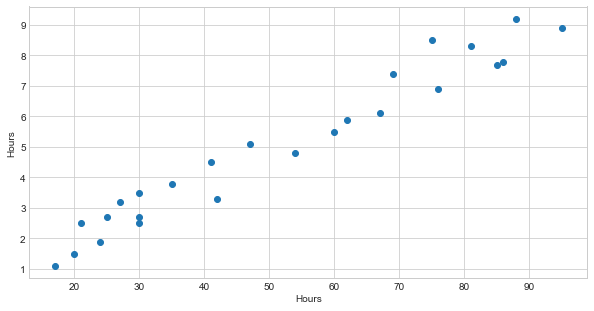

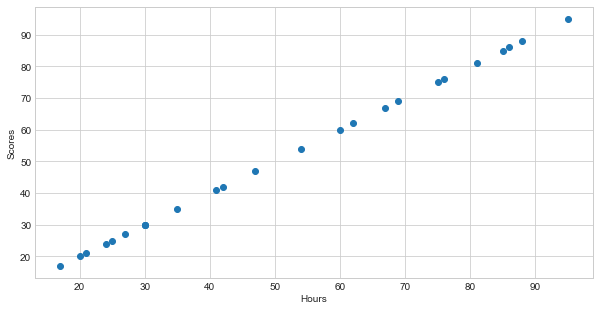

In [133]:
for i in num_var:
    plt.figure(figsize=(10,5))
    plt.xlabel('Hours')
    plt.ylabel(i)
    x=df['Scores']
    y=df[i]
    plt.scatter(x,y)
    

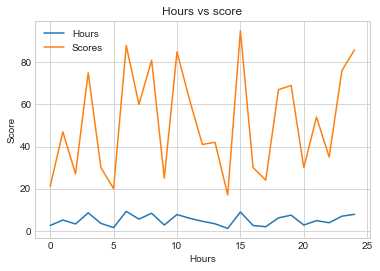

In [134]:
plt.style.use("seaborn-whitegrid")
df.plot(kind="line")
plt.title("Hours vs score")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

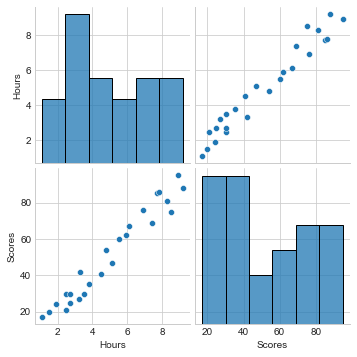

In [135]:
sns.pairplot(df)

In [136]:
X=df.drop(columns=['Scores'])
y=df['Scores']

## Training the Algorithm

In [137]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [138]:
LR =LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [139]:
print ('Coeffiecients:', LR.coef_)
print ('Intercept:', LR.intercept_)

Coeffiecients: [9.91065648]
Intercept: 2.0181600414346974


## Plotting the regression line

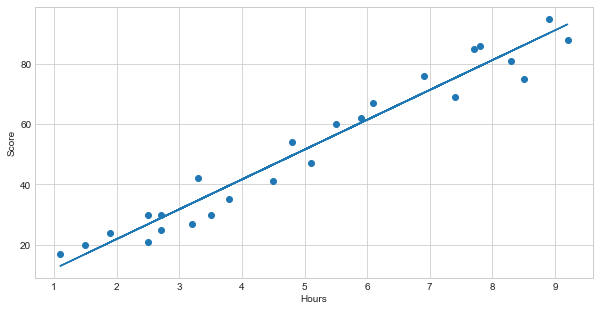

In [140]:
line = LR.coef_*X+LR.intercept_

# Plotting for the test data
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

# Making Predictions

## Predicted Values

In [141]:
print(X_test)
y_pred = LR.predict(X_test) 

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


## Actual Values

In [142]:
print(y_test)

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64


## Actual vs Predicted values

In [143]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [144]:
LR.score(X_train,y_train)

0.9515510725211552

In [145]:
LR.score(X_test,y_test)

0.9454906892105355

## Predict the score for 9.25 hours study time

In [146]:
pred_score = LR.predict([[9.25]])
print(pred_score)

[93.69173249]


## Evaluation of the model

In [147]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
